In [82]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [83]:
df = pd.read_csv("C:\\Users\\Chris\\Documents\\Python Scripts\\Thinkful File Examples\\NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv", header=4)
df2 = pd.read_excel("C:\\Users\\Chris\\Documents\\Python Scripts\\Thinkful File Examples\\Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls", header=4)

In [84]:
# data cleaning

df['Population'] = df['Population'].str.replace(',', '')
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Property\ncrime'] = df['Property\ncrime'].str.replace(',', '')

df['Population'] = pd.to_numeric(df['Population'])
df['Population'] = df['Population']
df['Property crime'] = pd.to_numeric(df['Property\ncrime'])

df = df.drop([348, 349, 350])
df.fillna(0)
df['Robbery'] = pd.to_numeric(df['Robbery'])

In [85]:
# dataclean(df2)
df2 = df2.drop(index=369)
df2 = df2.drop(index=370)
df2['Property crime'] = df2['Property\ncrime']

In [86]:
# Creates features with Murder & Robbery > 1  being True with 1 and False 0 
df['Murder'] = (df['Murder and\nnonnegligent\nmanslaughter'] == 0)
df['Robbery_x'] = (df['Robbery'] == 0)
df['Murder'] = pd.get_dummies(df['Murder'])
df['Robbery_x'] = pd.get_dummies(df['Robbery_x'])
df['Pop_squared'] = df['Population']**2

#Created a Logrithmic Properity crime feature that helped property crime become more linear

df.iloc[df.loc[df['Property crime']==0].index, df.columns.get_loc('Property crime')] = 1
# df.iloc[0, df.columns.get_loc('COL_NAME')] = x
df['Property crime_2'] = np.log(df['Property crime'].astype('float64'))

In [87]:
df2.iloc[df2.loc[df2['Property crime']==0].index, df2.columns.get_loc('Property crime')] = 1

# df.loc[df['Property crime']==0]
# df = df.drop(index=df.loc[df['Property crime']==0].index)

In [89]:
# drop NYC outlier
df = df.drop(index=216)
df2 = df.drop(index=227)

In [90]:
from sklearn import linear_model
import statsmodels.formula.api as smf
# Function to instantiate and fit our model.
def regress(df):
    regr = linear_model.LinearRegression()
    Y = df['Property crime']
    # X = df[['Population','Pop_squared','Murder', 'Robbery_x']]
    X = df[['Population','Murder and\nnonnegligent\nmanslaughter', 'Robbery']]
    regr.fit(X, Y)
    print('\nCoefficients: \n', regr.coef_ )
    print('\nIntercept: \n', regr.intercept_ )
    print('\nR-squared:')
    print(regr.score(X, Y))


In [91]:
# Run Regression on both data sets
regress(df)
regress(df2)



Coefficients: 
 [1.58346761e-02 1.18435972e+02 2.02490402e+00]

Intercept: 
 25.2447104393612

R-squared:
0.9305591974235127

Coefficients: 
 [1.58293189e-02 1.18428252e+02 2.02620077e+00]

Intercept: 
 25.43214850988869

R-squared:
0.9305360353819127


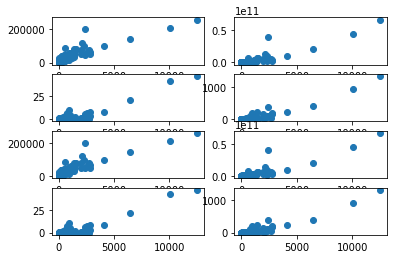

In [63]:
# Testing the model
# Linear Relationships

f, axarr = plt.subplots(4,2)
axarr[0,0].scatter(df['Property crime'], df['Population'])
axarr[0,1].scatter(df['Property crime'], df['Pop_squared'])
axarr[1,0].scatter(df['Property crime'], df['Murder and\nnonnegligent\nmanslaughter'])
axarr[1,1].scatter(df['Property crime'], df['Robbery'])

axarr[2,0].scatter(df2['Property crime'], df2['Population'])
axarr[2,1].scatter(df2['Property crime'], df2['Pop_squared'])
axarr[3,0].scatter(df2['Property crime'], df2['Murder and\nnonnegligent\nmanslaughter'])
axarr[3,1].scatter(df2['Property crime'], df2['Robbery'])


In [81]:
# Cross Validation of 2013 data
split = 5
x=0
while x < split:
    total = df.shape
    front = int((total[0] / split)*x)
    back = int((total[0] / split)*(x+1))
#     print(front, ' - ', back)
    regress(df[front:back])

#     print((y_pred[front:back] == target[front:back]).sum() / (y_pred[front:back] == target[front:back]).count())
    x+=1



Coefficients: 
 [ 1.89797844e-02 -3.73701511e+02  1.91972515e+01]

Intercept: 
 -27.49724918591494

R-squared:
0.9868707810048604

Coefficients: 
 [ 1.72643806e-02 -6.88463680e+01  8.03016858e+00]

Intercept: 
 6.631132606098049

R-squared:
0.8295455010296683

Coefficients: 
 [ 1.62778606e-02 -3.30080949e+01  2.49180200e+00]

Intercept: 
 21.583084989634102

R-squared:
0.7198138175481431

Coefficients: 
 [ 1.14586471e-02 -5.49403432e+01  1.07124805e+01]

Intercept: 
 58.896093462647684

R-squared:
0.9649424165332565

Coefficients: 
 [ 1.05191322e-02  2.51419329e+02 -1.23543161e+00]

Intercept: 
 78.61254720163555

R-squared:
0.9210388034777087


In [80]:
# Cross Validation of 2013 data
split = 5
x=0
while x < split:
    total = df2.shape
    front = int((total[0] / split)*x)
    back = int((total[0] / split)*(x+1))
#     print(front, ' - ', back)
    regress(df2[front:back])

#     print((y_pred[front:back] == target[front:back]).sum() / (y_pred[front:back] == target[front:back]).count())
    x+=1


Coefficients: 
 [ 1.89797844e-02 -3.73701511e+02  1.91972515e+01]

Intercept: 
 -27.49724918591494

R-squared:
0.9868707810048604

Coefficients: 
 [ 1.72643806e-02 -6.88463680e+01  8.03016858e+00]

Intercept: 
 6.631132606098049

R-squared:
0.8295455010296683

Coefficients: 
 [ 1.63543780e-02 -3.23583885e+01  2.46052966e+00]

Intercept: 
 18.666651744128643

R-squared:
0.7227495605315217

Coefficients: 
 [ 1.13617336e-02 -5.52335052e+01  1.07429791e+01]

Intercept: 
 62.64185388395384

R-squared:
0.964837928112944

Coefficients: 
 [ 1.05191322e-02  2.51419329e+02 -1.23543161e+00]

Intercept: 
 78.61254720163555

R-squared:
0.9210388034777087


In this challenge I am validating the results of my 2013 NY Crime data model. I trained 2013 NY crime data model and tested with the model with 2014 NY crime data.  

I used 5 data folds to cross validate the data.  The result was R-squared figures of 0.98, 0.82, 0.72, 0.96 and 0.92 respectively.  These figures were almost identical in both models.  This could be because crime data from 2013 to 2014 was largely unchanged.  The variance in the 5 folds could be due to some overfitting of the model.  More research would need to be done to understand in the business case if this is an acceptable amount of variance.